In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from skimage.morphology import skeletonize 

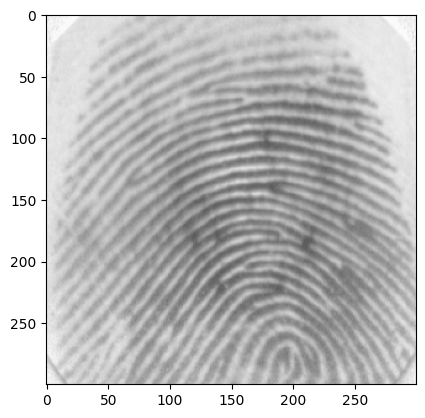

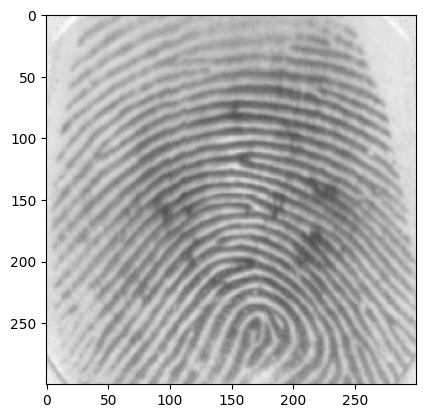

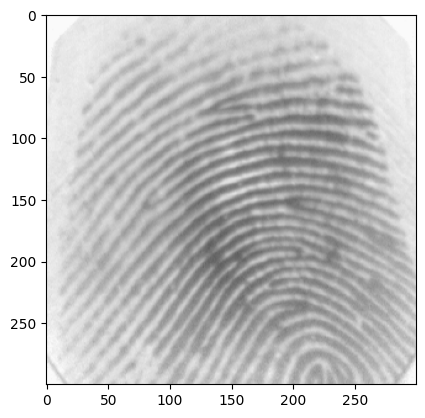

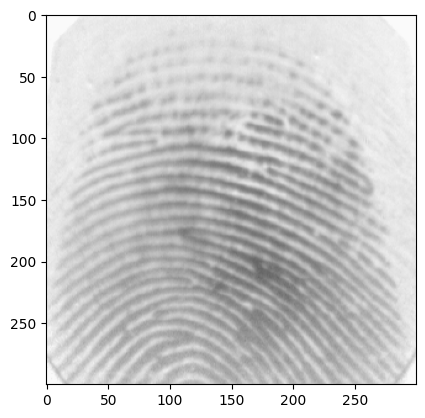

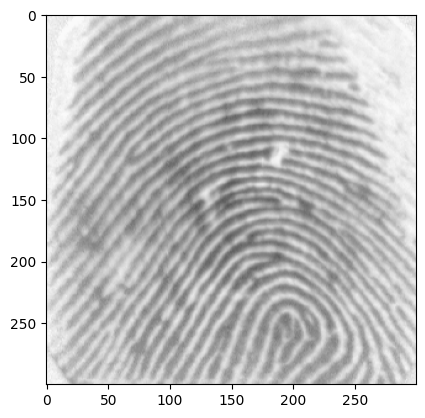

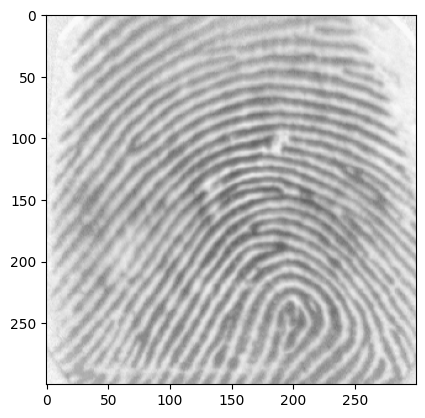

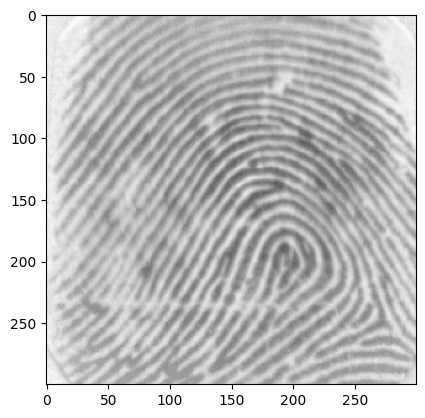

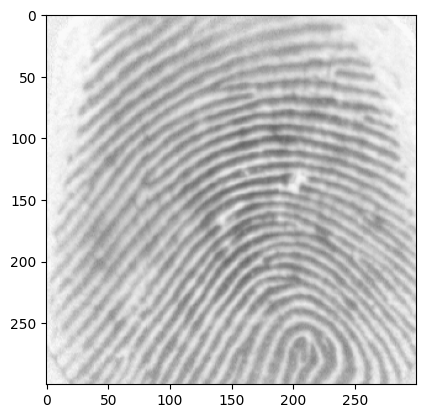

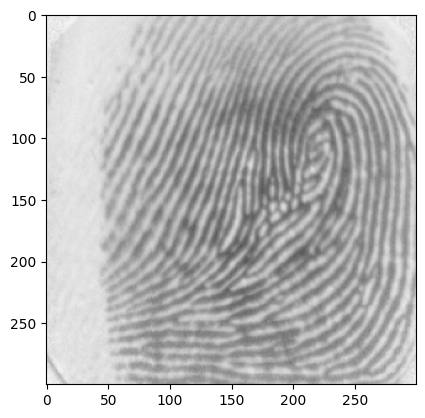

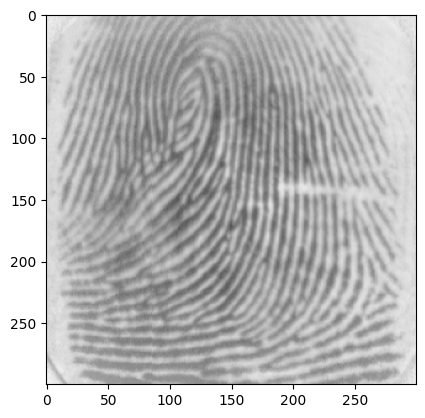

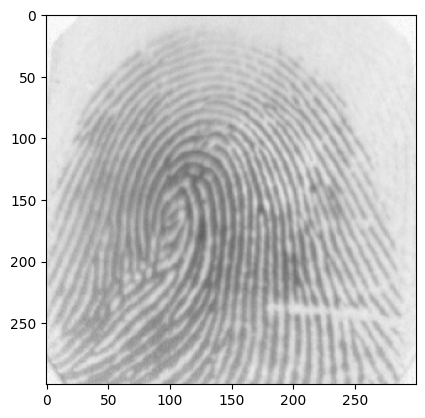

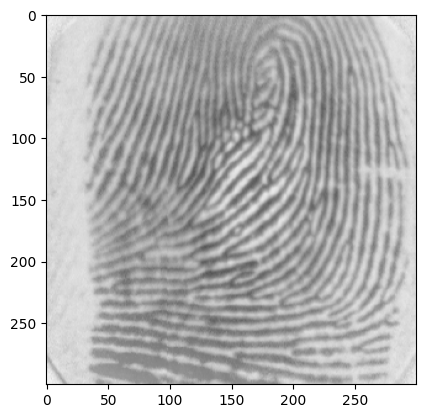

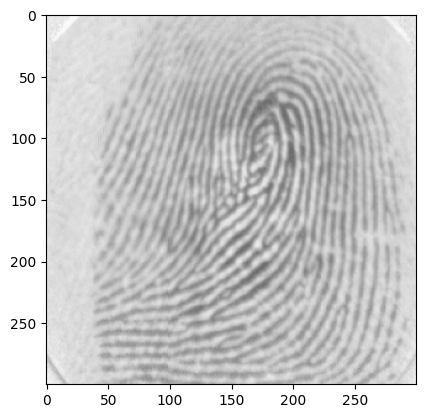

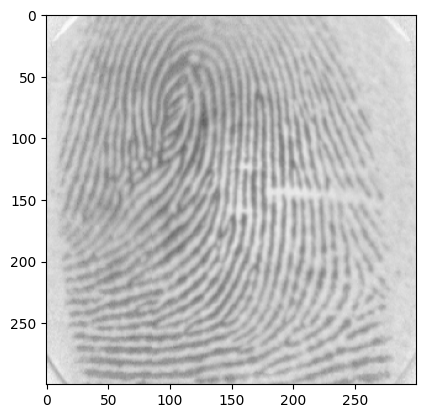

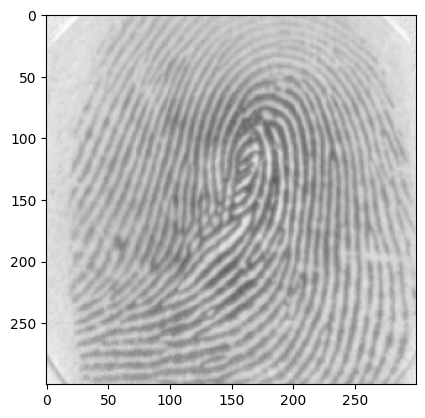

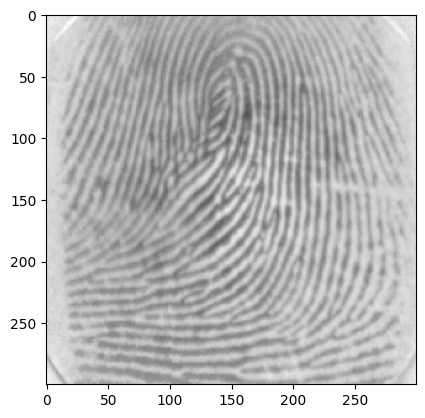

In [5]:
current_dir = os.getcwd()
image_names = os.listdir(os.path.join(current_dir, 'images', 'fingers'))

shutil.rmtree(os.path.join(current_dir, 'images', 'reshape'))
os.mkdir(os.path.join(current_dir, 'images', 'reshape'))

for image_name in image_names:
    try:
        image = cv2.imread(os.path.join(current_dir, 'images', 'fingers', image_name))
        correct = cv2.imwrite(os.path.join(current_dir, 'images', 'reshape', image_name), image[0:300, 0:200])
        plt.imshow(image)
        plt.show()
    except:    
        pass

101_1.tif


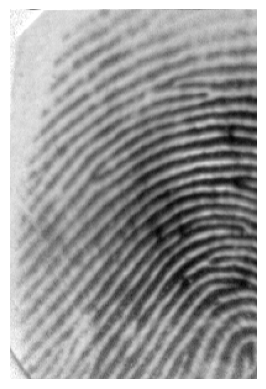

In [6]:
image_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))[0]
print(image_path)
image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis(False)
plt.imshow(image, cmap='gray')
plt.show()

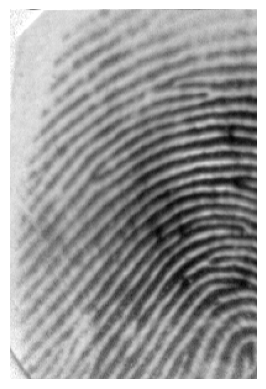

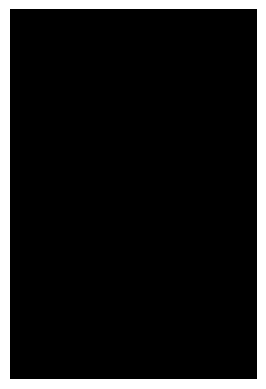

In [ ]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
for image_path in images_path:
    image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.axis(False)
    plt.imshow(image, cmap='gray')
    plt.show()
    _, binarized = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
    plt.axis(False)
    plt.imshow(binarized, cmap='gray')
    plt.show()
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    img = np.copy(binarized)
    size = np.size(img)
    done = False
    skel = np.zeros(img.shape, np.uint8)
    while(not done):
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()
    
        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    
    #plt.axis(False)
    plt.title("no skimage")
    plt.imshow(skel, cmap="gray")
    plt.show()
    skelet = skeletonize(binarized, method='lee')
    plt.title("skimage")
    plt.imshow(skelet, cmap="gray")
    plt.show()
    _, skel_inv = cv2.threshold(skel, 1, 255, cv2.THRESH_BINARY_INV)
    print(skel)
    plt.imshow(skel_inv, cmap="gray")
    plt.show()

            

In [ ]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
path = images_path[0]
#for path in images_path:
image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binarized = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

skelet = skeletonize(binarized, method='lee')
skel_inv = np.array([np.array([(np.array([255*int(not i), 255*int(not i), 255*int(not i)])) for i in j]) for j in skelet])
nodes = []
tails = []
for row_ind in range(1, len(skel_inv)-1):
    for col_ind in range(1, len(skel_inv[row_ind])-1):
        if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) > 2:
            nodes.append((col_ind, row_ind))
        if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) < 2:
            tails.append([col_ind, row_ind])
skel_inv_nodes = np.copy(skel_inv)
for node in nodes:
    skel_inv_nodes= cv2.circle(skel_inv_nodes, node, 1, (255, 0, 0), -1)
skel_inv_nodes_tails = np.copy(skel_inv_nodes)
for tail in tails:
    skel_inv_nodes_tails = cv2.circle(skel_inv_nodes_tails, tail, 1, (0, 0, 255), -1)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(30)
fig.set_figheight(20)
ax[0].imshow(image, cmap='gray')
ax[1].imshow(skel_inv)
ax[2].imshow(skel_inv_nodes_tails)
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
plt.show()


In [ ]:
#plt.imshow(skel_inv_nodes_tails[0*20:0*20 + 20, 1*20:1*20 + 20,:])
#plt.show()
fig, ax = plt.subplots(nrows=15, ncols=10)
nodes_count = np.array([])
tails_count = np.array([])
for row_ind in range(len(ax)):
    nodes_count_row = np.array([])
    tails_count_row = np.array([])
    for col_ind in range(len(ax[row_ind])):
        ax[row_ind][col_ind].imshow(skel_inv_nodes_tails[row_ind*20:row_ind*20 + 20, col_ind*20:col_ind*20 + 20,:])
        ax[row_ind][col_ind].axis(False)
        nodes_count_row = np.append(nodes_count_row, sum(1 for x,y in nodes if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
        tails_count_row = np.append(tails_count_row, sum(1 for x,y in tails if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
    nodes_count = np.append(nodes_count, nodes_count_row)
    tails_count = np.append(tails_count, tails_count_row)
plt.show()
nodes_count_input = nodes_count.reshape(len(ax), len(ax[0]))
tails_count_input = tails_count.reshape(len(ax), len(ax[0]))

print(nodes_count_input)
print(tails_count_input)
print(np.sum(tails_count_input))

In [ ]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
#path = images_path[0]
for path in images_path[1:]:
    image = cv2.imread(os.path.join(current_dir, 'images', 'reshape', path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binarized = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

    skelet = skeletonize(binarized, method='lee')
    skel_inv = np.array([np.array([(np.array([255*int(not i), 255*int(not i), 255*int(not i)])) for i in j]) for j in skelet])
    nodes = []
    tails = []
    for row_ind in range(1, len(skel_inv)-1):
        for col_ind in range(1, len(skel_inv[row_ind])-1):
            if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) > 2:
                nodes.append((col_ind, row_ind))
            if sum(skel_inv[row_ind][col_ind]) == 0 and [sum(skel_inv[row_ind - 1][col_ind + 1]) == 0, sum(skel_inv[row_ind -1][col_ind - 1]) == 0, sum(skel_inv[row_ind + 1][col_ind + 1]) == 0, sum(skel_inv[row_ind + 1][col_ind-1]) == 0,sum(skel_inv[row_ind + 1][col_ind]) == 0, sum(skel_inv[row_ind - 1][col_ind]) == 0, sum(skel_inv[row_ind][col_ind + 1]) == 0, sum(skel_inv[row_ind][col_ind - 1]) == 0].count(True) < 2:
                tails.append([col_ind, row_ind])
    skel_inv_nodes = np.copy(skel_inv)
    for node in nodes:
        skel_inv_nodes= cv2.circle(skel_inv_nodes, node, 1, (255, 0, 0), -1)
    skel_inv_nodes_tails = np.copy(skel_inv_nodes)
    for tail in tails:
        skel_inv_nodes_tails = cv2.circle(skel_inv_nodes_tails, tail, 1, (0, 0, 255), -1)

    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.set_figwidth(30)
    fig.set_figheight(20)
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(skel_inv)
    ax[2].imshow(skel_inv_nodes_tails)
    ax[0].axis(False)
    ax[1].axis(False)
    ax[2].axis(False)
    plt.show()
    fig, ax = plt.subplots(nrows=15, ncols=10)
    j = 0
    ind = 0
    nodes_count = np.array([])
    tails_count = np.array([])
    for row_ind in range(len(ax)):
        nodes_count_row = np.array([])
        tails_count_row = np.array([])
        for col_ind in range(len(ax[row_ind])):
            ax[row_ind][col_ind].imshow(skel_inv_nodes_tails[row_ind*20:row_ind*20 + 20, col_ind*20:col_ind*20 + 20,:])
            ax[row_ind][col_ind].axis(False)
            nodes_count_row = np.append(nodes_count_row, sum(1 for x,y in nodes if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
            tails_count_row = np.append(tails_count_row, sum(1 for x,y in tails if row_ind*20 <= y < row_ind*20+20 and col_ind*20 <= x < col_ind*20+20))
        nodes_count = np.append(nodes_count, nodes_count_row)
        tails_count = np.append(tails_count, tails_count_row)
    plt.show()
    nodes_count = nodes_count.reshape(len(ax), len(ax[0]))
    tails_count = tails_count.reshape(len(ax), len(ax[0]))

    #print(nodes_count)
    #print(tails_count)

    prob_nodes = 0
    prob_tails = 0
    count = 0
    prob_sum_tails = min(np.sum(tails_count), np.sum(tails_count_input))/max(np.sum(tails_count), np.sum(tails_count_input))
    prob_sum_nodes = min(np.sum(nodes_count), np.sum(nodes_count_input))/max(np.sum(nodes_count), np.sum(nodes_count_input))
    for row_ind in range(len(nodes_count)):
        for col_ind in range(len(nodes_count[row_ind])):
            count += 1
            if tails_count[row_ind, col_ind] == tails_count_input[row_ind, col_ind]:
                prob_tails +=1
            else:
                prob_tails += min(tails_count[row_ind, col_ind], tails_count_input[row_ind, col_ind]) / max(tails_count[row_ind, col_ind], tails_count_input[row_ind, col_ind]) 
            if nodes_count[row_ind, col_ind] == nodes_count_input[row_ind, col_ind]:
                prob_nodes +=1
            else:
                prob_nodes += min(nodes_count[row_ind, col_ind], nodes_count_input[row_ind, col_ind]) / max(nodes_count[row_ind, col_ind], nodes_count_input[row_ind, col_ind])
    prob_nodes /= count
    prob_tails /= count
    print(f'\nprob_nodes = {prob_nodes}\nprob_tails = {prob_tails}\nprob_sum_nodes = {prob_sum_nodes}\nprob_sum_tails = {prob_sum_tails}\n')

In [4]:
import os
import cv2
import shutil

import numpy as np
import matplotlib.pyplot as plt

from finger_print import FingerPrint
from CompareFingerPrints import compareFingerPrints

In [ ]:
current_dir = os.getcwd()
image_names = os.listdir(os.path.join(current_dir, 'images', 'fingers'))

shutil.rmtree(os.path.join(current_dir, 'images', 'reshape'))
os.mkdir(os.path.join(current_dir, 'images', 'reshape'))
fig, ax = plt.subplots(ncols = len(image_names), nrows = 1)
fig.set_figwidth(15)
fig.set_figheight(10)
for ind in range(len(image_names)):
    image_name = image_names[ind]
    try:
        image = cv2.imread(os.path.join(current_dir, 'images', 'fingers', image_name))
        correct = cv2.imwrite(os.path.join(current_dir, 'images', 'reshape', image_name), image[0:300, 0:200])
        
        ax[ind].imshow(image)
        ax[ind].set_title(image_name)
        ax[ind].axis(False)
    except:    
        pass

In [ ]:
images_path = os.listdir(os.path.join(current_dir, 'images', 'reshape'))
images_path = [os.path.join(current_dir, 'images', 'reshape', path) for path in images_path]
for path in images_path[1:]:
    print(path)
    t_sum_prob, n_sum_prob, t_prob, n_prob = compareFingerPrints(images_path[0], path)
    print(f"\n\nt_sum_prob = {t_sum_prob}\nn_sum_prob = {n_sum_prob}\nt_prob = {t_prob}\nn_prob = {n_prob}\n\n")
    probability = (t_sum_prob*10/3 + n_sum_prob*10 + t_prob + n_prob*10) / (10/3 + 10 + 1 + 10)
    print(f"\n{'-'*200}\nProbability of a match: {probability}\n{'-'*200}\n") 

    while cv2.waitKey(1)&0xff != ord('q'):
        pass
    cv2.destroyAllWindows()
    

